# Área de imports

In [ ]:
! pip install texthero

In [2]:
import pandas as pd 
import seaborn as sns 
import texthero as hero 
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Carregamento dos dados

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/LucasRotsen/tcc_case_study_tutorial/main/data/SMSSpamCollection.txt', sep='\t', names=['label', 'message', 'a'])

In [4]:
df = df[['label', 'message']]

# Análise exploratória dos dados

In [5]:
df.columns

Index(['label', 'message'], dtype='object')

In [6]:
df.shape

(1400, 2)

In [7]:
df.head(5)

label                                            message
0  spam  free entry wkly comp win fa cup final tkts 21s...
1  spam  freemsg hey darling week word back like fun st...
2  spam  winner valued network customer selected receiv...
3  spam  mobile months u r entitled update latest colou...
4  spam  six chances win cash pounds txt csh11 send cos...

In [8]:
df[df['label'] == 'spam'].head(15)

label                                            message
0   spam  free entry wkly comp win fa cup final tkts 21s...
1   spam  freemsg hey darling week word back like fun st...
2   spam  winner valued network customer selected receiv...
3   spam  mobile months u r entitled update latest colou...
4   spam  six chances win cash pounds txt csh11 send cos...
5   spam  urgent week free membership prize jackpot txt ...
6   spam  xxxmobilemovieclub use credit click wap link n...
7   spam  england v macedonia dont miss goals team news ...
8   spam  thanks subscription ringtone uk mobile charged...
9   spam  rodger burns msg tried call reply sms free nok...
10  spam  sms ac sptv new jersey devils detroit red wing...
11  spam  congrats year special cinema pass call c suprm...
12  spam  valued customer pleased advise following recen...
13  spam  urgent ur awarded complimentary trip eurodisin...
14  spam            hear new divorce barbie comes ken stuff

In [9]:
df[df['label'] == 'ham'].head(15)

label                                            message
700   ham  go jurong point crazy available bugis n great ...
701   ham                            ok lar joking wif u oni
702   ham                u dun say early hor u c already say
703   ham             nah think goes usf lives around though
704   ham     even brother like speak treat like aids patent
705   ham  per request melle melle oru minnaminunginte nu...
706   ham  gonna home soon want talk stuff anymore tonigh...
707   ham  searching right words thank breather promise w...
708   ham                                        date sunday
709   ham                                      oh k watching
710   ham  eh u remember spell name yes v naughty make v wet
711   ham                         fine way u feel way gota b
712   ham                               seriously spell name
713   ham                      going try months ha ha joking
714   ham                     ü pay first lar da stock comin

In [10]:
df.isna().sum()

label      0
message    1
dtype: int64

In [11]:
df['label'].value_counts()

ham     700
spam    700
Name: label, dtype: int64

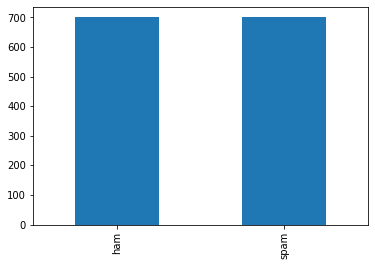

In [12]:
df['label'].value_counts().plot(kind='bar')

In [13]:
df = df.dropna()

In [14]:
df['message-size'] = df['message'].apply(lambda x: len(x))

df.groupby('label')['message-size'].mean() 

label
ham     43.991416
spam    92.261429
Name: message-size, dtype: float64

In [15]:
def text_cleaning(df):
  custom_pip = [
                hero.preprocessing.lowercase,
                hero.preprocessing.remove_digits,
                hero.preprocessing.remove_punctuation,
                hero.preprocessing.remove_stopwords,
                hero.preprocessing.remove_whitespace
  ]

  return hero.clean(df['message'], custom_pip)

In [16]:
df['message'] = text_cleaning(df)

In [17]:
def collect_n_most_frequent_words(df, n):
  return pd.Series(' '.join(df['message']).split()).value_counts()[:n].to_dict()

In [18]:
spam_df = df[df['label'] == 'spam'] 

top_20 = collect_n_most_frequent_words(spam_df, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



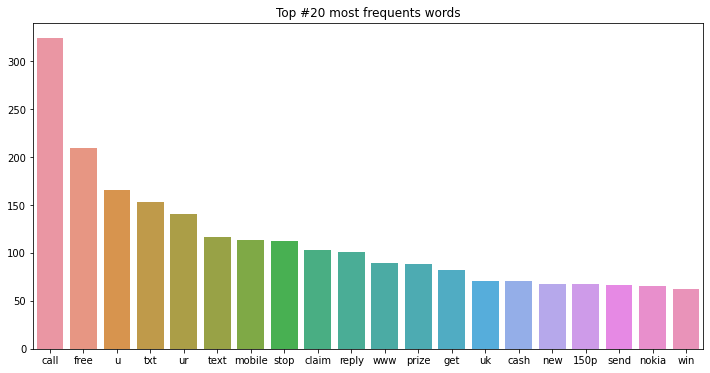

In [19]:
plt.figure(figsize=(12,6))

chart = sns.barplot(
    list(top_20.keys()),
    list(top_20.values())
).set_title("Top #20 most frequents words")